In [ ]:
import numpy as np
import pandas as pd


df=pd.read_csv('C:/Users/USER/Documents/Github/Machine Learning/datasets/Salary_dataset.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
YearsExperience,0
Salary,0


In [ ]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [ ]:
y=df['Salary']
X=df[['YearsExperience']]

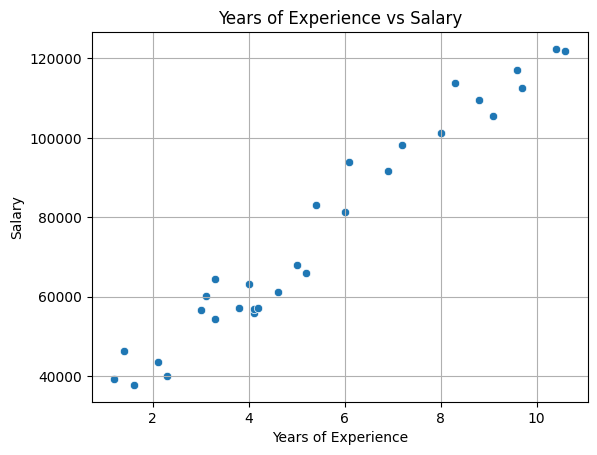

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df,x='YearsExperience',y='Salary')
plt.title("Years of Experience vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.grid(True)
plt.show()

In [ ]:
print(df.corr())

                 Unnamed: 0  YearsExperience    Salary
Unnamed: 0         1.000000         0.986460  0.960826
YearsExperience    0.986460         1.000000  0.978242
Salary             0.960826         0.978242  1.000000


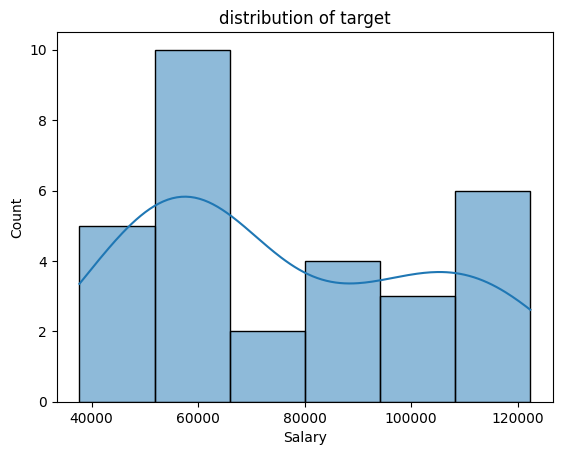

In [ ]:
sns.histplot(y,kde=True)
plt.title('distribution of target')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

model=LinearRegression()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [ ]:
model.fit(X_train,y_train)
y_train_pred=model.predict(X_train)
y_pred=model.predict(X_test)




In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,root_mean_squared_error,root_mean_squared_error


In [ ]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 6286.453830757745
MSE: 49830096.855908394
RMSE: 7059.04362190151
R2 Score: 0.9024461774180497


In [ ]:
# Intercept and coefficient
intercept = model.intercept_
slope = model.coef_[0]

print(f"Intercept (b0): {intercept}")
print(f"Slope (b1): {slope}")

Intercept (b0): 24380.201479473704
Slope (b1): 9423.815323030976


In [ ]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison)

      Actual      Predicted
27  112636.0  115791.210113
15   67939.0   71499.278095
23  113813.0  102597.868661
17   83089.0   75268.804224
8    64446.0   55478.792045
9    57190.0   60190.699707


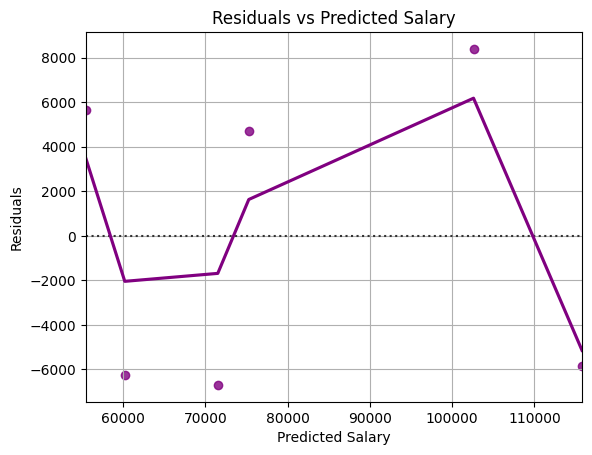

In [ ]:
residuals = y_test - y_pred

# Plot residuals
sns.residplot(x=y_pred, y=residuals, lowess=True, color="purple")
plt.xlabel("Predicted Salary")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Salary")
plt.grid(True)
plt.show()

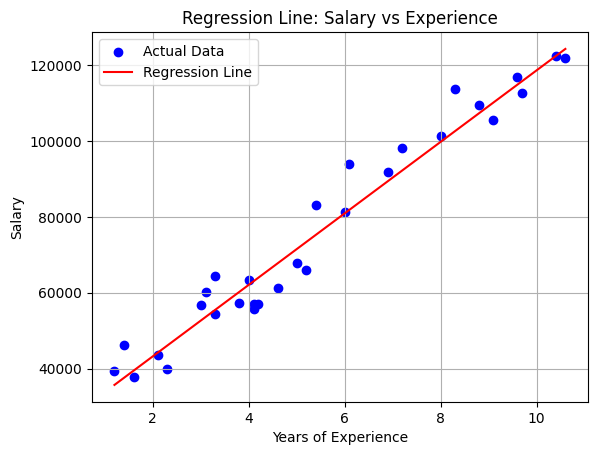

In [ ]:
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.title('Regression Line: Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()